## Importing the libraries and the dataset 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv', sep = "\t")
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
data.shape

(1000, 2)

In [5]:
data.describe(include='all')

,Review,Liked
count,1000,1000.00000
unique,996,NaN
top,I won't be back.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [6]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

## Text cleaning(removing special characters and converting everything to lowercase)

In [7]:
#Regular expression is a library that helps remove stuff from your corpus in our case, special charaters
import re

In [8]:
def cleaned_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

In [9]:
data['Cleaned_Reviews'] = data['Review'].apply(cleaned_text)

In [10]:
data.head()

,Review,Liked,Cleaned_Reviews
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


## Now that we have the cleaned text we will drop the uncleaned one as we no longer need it and will be training the model from the cleaned data

In [11]:
data = data.drop('Review', axis = 1)
data.head()

,Liked,Cleaned_Reviews
0,1,wow loved this place
1,0,crust is not good
2,0,not tasty and the texture was just nasty
3,1,stopped by during the late may bank holiday of...
4,1,the selection on the menu was great and so wer...


## Tokenization

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
tokenize_data = data['Cleaned_Reviews'].apply(nltk.word_tokenize)
print(tokenize_data)

0                              [wow, loved, this, place]
1                                 [crust, is, not, good]
2      [not, tasty, and, the, texture, was, just, nasty]
3      [stopped, by, during, the, late, may, bank, ho...
4      [the, selection, on, the, menu, was, great, an...
                             ...                        
995    [i, think, food, should, have, flavor, and, te...
996                          [appetite, instantly, gone]
997    [overall, i, was, not, impressed, and, would, ...
998    [the, whole, experience, was, underwhelming, a...
999    [then, as, if, i, hadnt, wasted, enough, of, m...
Name: Cleaned_Reviews, Length: 1000, dtype: object


## After tokenizing the data we will remove stopwords

In [14]:
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'him', 'why', 'these', 'there', "hadn't", 'same', 'of', 'this', 'are', 'those', 'was', 'over', 'can', 'we', 'doing', 'ours', "doesn't", 'only', "should've", 'each', 'he', 'y', 'have', "don't", 'my', "isn't", 'weren', 'they', 'on', 'with', 'hadn', 'has', 'herself', 'how', 'because', 'haven', 'too', "she's", 'hers', "mightn't", 'yours', 'our', 'ma', 'myself', 'out', 've', 'below', 'after', "won't", 'between', 'through', 'himself', 'aren', 'o', "that'll", 'then', 'm', 'been', 'themselves', 'does', 'had', 'whom', 'than', 'if', "you'd", 'is', 'them', 're', 'and', 'hasn', 'wasn', 'into', 'who', 'in', 'few', 'any', 'd', 'off', 'mustn', 'further', 'couldn', 'as', 'its', 'during', 'to', 'having', 'from', 'now', 'or', 'needn', 'an', 'don', 'other', 'down', 'were', 'yourselves', 's', 'about', 'own', 'theirs', 'wouldn', 'some', 'ain', 'but', "shan't", 'more', 'until', 'most', 'by', 'itself', 'did', 'nor', "shouldn't", 'me', 'against', 'not', 'that', "couldn't", 'at', "needn't", 'the', 'am', 'will

In [16]:
def stopword_removal(tokenize_data):
    corpus = []  
    for i in tokenize_data:
        if i not in stop_words:  
            corpus.append(i)  
    return corpus

filtered_reviews = tokenize_data.apply(stopword_removal)

In [17]:
print(filtered_reviews)

0                                    [wow, loved, place]
1                                          [crust, good]
2                                [tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                       [selection, menu, great, prices]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997                [overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, well...
999    [hadnt, wasted, enough, life, poured, salt, wo...
Name: Cleaned_Reviews, Length: 1000, dtype: object


## Stemming

In [18]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [19]:
def stemmed_words(tokens):
    stemmed_data = []
    for i in tokens:
        stemmed_tokens = stemmer.stem(i)
        stemmed_data.append(stemmed_tokens)
    return stemmed_data

In [20]:
stemmed_data = filtered_reviews.apply(stemmed_words)
print(stemmed_data.head)

<bound method NDFrame.head of 0                                     [wow, love, place]
1                                          [crust, good]
2                                 [tasti, textur, nasti]
3      [stop, late, may, bank, holiday, rick, steve, ...
4                           [select, menu, great, price]
                             ...                        
995                  [think, food, flavor, textur, lack]
996                           [appetit, instantli, gone]
997                   [overal, impress, would, go, back]
998    [whole, experi, underwhelm, think, well, go, n...
999    [hadnt, wast, enough, life, pour, salt, wound,...
Name: Cleaned_Reviews, Length: 1000, dtype: object>


## Bag of Words (BoW)

In [21]:
def join_words(tokens):
    return ' '.join(tokens)

In [22]:
stemmed_data = stemmed_data.apply(join_words)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 1500)

In [24]:
x = vectorizer.fit_transform(stemmed_data).toarray()
y = data.iloc[:, 0].values

## Splitting into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training a logistic regression model 

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Predicting on the testing set 

In [27]:
y_pred = logreg.predict(x_test)
results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(results)

     Predicted  Actual
0            0       0
1            0       0
2            0       0
3            0       0
4            0       0
..         ...     ...
195          0       0
196          1       1
197          1       1
198          0       0
199          0       1

[200 rows x 2 columns]


In [28]:
from sklearn.metrics import accuracy_score
print(f'accuracy score :{accuracy_score(y_test, y_pred)}')

accuracy score :0.75


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)

print('confusion matrix : \n',cm)

confusion matrix : 
 [[79 32]
 [18 71]]


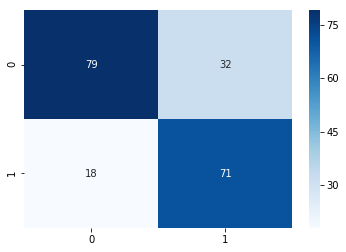

In [30]:
sns.heatmap(cm, annot=True, cmap='Blues')

In [31]:
TP = cm[0:0]
TN = cm[1:1]
FP = cm[0:1]
FN = cm[1:0]

## Precision

In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_test, y_pred)
print(precision)

0.797752808988764


## Recall

In [33]:
recall = recall_score(y_test, y_pred)
print(recall)

0.6893203883495146


## f1 score

In [34]:
f1 = f1_score(y_pred, y_test)
print(f1)

0.7395833333333331


## Cross validation

In [35]:
from sklearn.model_selection import cross_val_score
cross_validated_accuracy = cross_val_score(logreg, x_train, y_train, cv = 5, scoring = 'accuracy')
print(f'cross validated accuracy is {cross_validated_accuracy}')

cross validated accuracy is [0.75625 0.76875 0.7875  0.75625 0.7625 ]


## ROC AUC Curve

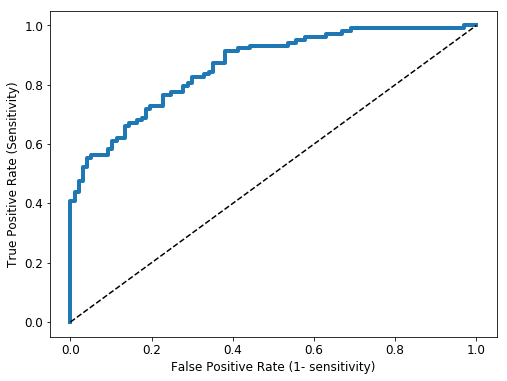

In [45]:
y_pred1 = logreg.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_test, y_pred1)

plt.figure(figsize = (8,6))

plt.plot(fpr,tpr,linewidth = 4)

plt.plot([0,1],[0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.xlabel('False Positive Rate (1- sensitivity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()